## Capstone Two: Preprocessing and Training Data Development

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas import get_dummies
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
clean_df = pd.read_csv('Clean_df.csv')

In [3]:
clean_df.head()

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,no,0


As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

In [4]:
clean_df.drop(columns='duration', inplace=True)

Notice that 'pdays' contains negative (-1) value, that needs to be investigated for removal.

In [5]:
k=-1
count = len([i for i in clean_df['pdays'] if i == k])
count

36954

Delete pdays as this column has mostly  -1 value.

In [6]:
clean_df.drop(columns='pdays', inplace=True)

Also delete 'age' column as not necessary when we have 'age group' clusters.
Additionally, feature 'response' is a duplicate of 'y' feature, so needs to be taken out.

In [7]:
clean_df.drop(columns=['age','response'], inplace=True)


In [8]:
#Replacing all 'yes' and 'no' to binary 1, 0

clean_df['eligible'].replace(('Y', 'N'), (1,0), inplace=True)
clean_df.replace(('yes', 'no'), (1,0), inplace=True)


In [9]:
clean_df

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,5,1,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,1,0,unknown,0
1,4,1,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,1,0,unknown,0
2,3,1,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,1,0,unknown,0
3,4,1,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,1,0,unknown,0
4,3,1,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,1,technician,60000,married,tertiary,1,0,825,0,0,cellular,17,nov,3,0,unknown,1
45207,7,0,retired,55000,divorced,primary,1,0,1729,0,0,cellular,17,nov,2,0,unknown,1
45208,7,0,retired,55000,married,secondary,1,0,5715,0,0,cellular,17,nov,5,3,success,1
45209,5,1,blue-collar,20000,married,secondary,1,0,668,0,0,telephone,17,nov,4,0,unknown,0


In [10]:
clean_df.describe()

,age group,eligible,salary,targeted,default,balance,housing,loan,day,campaign,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,3.645861,0.959501,57006.171065,0.820398,0.018027,1362.272058,0.555838,0.160226,15.806419,2.763841,0.580323,0.116985
std,1.083271,0.197129,32085.718415,0.383860,0.133049,3044.765829,0.496878,0.366820,8.322476,3.098021,2.303441,0.321406
min,1.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,20000.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,60000.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,2.000000,0.000000,0.000000
75%,4.000000,1.000000,70000.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,3.000000,0.000000,0.000000
max,9.000000,1.000000,120000.000000,1.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,63.000000,275.000000,1.000000


### Transform Categorical Features

In [11]:
cont_features = []
cat_features = []

for c in clean_df.columns:
    if clean_df[c].dtype == 'int64':
        cont_features += [c]
    else:
        cat_features += [c]

In [12]:
cat_features

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

We will transform the categorical data to numerical with 'pd.get_dummies()'

In [13]:
df = pd.get_dummies(data=clean_df,columns=cat_features,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age group            45211 non-null  int64
 1   eligible             45211 non-null  int64
 2   salary               45211 non-null  int64
 3   targeted             45211 non-null  int64
 4   default              45211 non-null  int64
 5   balance              45211 non-null  int64
 6   housing              45211 non-null  int64
 7   loan                 45211 non-null  int64
 8   day                  45211 non-null  int64
 9   campaign             45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

### Split the data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), 
                                                    df.y.values, test_size=0.3, 
                                                    random_state=47, stratify=df.y)

In [15]:
X_test.to_csv(r'/Users/majapedigo/Desktop/Capstone-Project-I/X_test.csv', index=False)


In [16]:
pd.DataFrame(y_test).to_csv(r'/Users/majapedigo/Desktop/Capstone-Project-I/y_test.csv', index=False)


In [17]:
pd.DataFrame(y_train).to_csv(r'/Users/majapedigo/Desktop/Capstone-Project-I/y_train.csv', index=False)


In [18]:
train_columns = X_train

In [19]:
X_train.shape, X_test.shape

((31647, 43), (13564, 43))

In [20]:
y_train.shape, y_test.shape

((31647,), (13564,))

#### Scale the Data

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

### Fit different models 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Import metrics and evaluations
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### Logistic Regression

In [23]:
lor = LogisticRegression().fit(X_tr_scaled, y_train)

In [24]:
y_tr_pred = lor.predict(X_tr_scaled)
y_te_pred = lor.predict(X_te_scaled)

##### Make a pipeline with this model

In [25]:
pipe_lor = make_pipeline(scaler, lor)
pipe_lor.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

##### Evaluating model using cross-validation

In [26]:
# perform StratifiedKFold as our target data is highly imbalanced and we want to replicate this during folding
k_fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)


In [27]:
cv_results = cross_validate(pipe_lor, X_train, y_train, cv=k_fold, scoring='accuracy')

In [28]:
print(pd.DataFrame(cv_results))

   fit_time  score_time  test_score
0  0.128061    0.008526    0.891311
1  0.122112    0.003760    0.891469
2  0.141757    0.003606    0.889082
3  0.105336    0.003643    0.888292
4  0.112927    0.003027    0.894770


In [29]:
cv_scores = cv_results['test_score']

In [30]:
np.mean(cv_scores), np.std(cv_scores)

(0.8909849018672542, 0.002260158855819227)

In [31]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.89, 0.9 ])

In [32]:
print(classification_report(y_test, y_te_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.66      0.19      0.29      1587

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



       0    1
0  11825  152
1   1290  297


<AxesSubplot:>

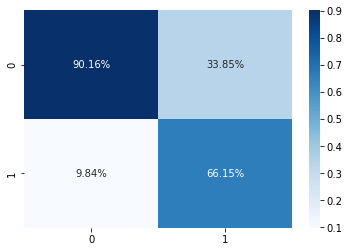

In [33]:
pl_lor = confusion_matrix(y_test,y_te_pred)
print(pd.DataFrame(pl_lor))
temp = pd.DataFrame(pl_lor)
sns.heatmap(temp/np.sum(temp), annot=True, fmt='.2%', cmap='Blues')

ROC/AUC

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
y_proba = lor.predict_proba(X_te_scaled)[:, 1]

In [36]:
fpr, tpr, treshold = roc_curve(y_test, y_proba)

In [37]:
roc_auc = metrics.auc(fpr, tpr)


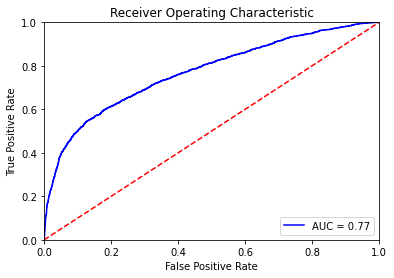

In [38]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Compare our model with DummyClassifier

In [39]:
from sklearn.dummy import DummyClassifier

In [40]:
dummy = DummyClassifier()

In [41]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [42]:
dummy.score(X_test, y_test)

0.8829991153052197

We can see that our model performs better than a dummy one.

#### Decision Tree 

In [43]:
dct = tree.DecisionTreeClassifier().fit(X_tr_scaled, y_train)

In [44]:
y_tr_pred = dct.predict(X_tr_scaled)
y_te_pred = dct.predict(X_te_scaled)

##### Make a pipeline with this model

In [45]:
pipe_dct = make_pipeline(scaler, dct)

##### Evaluating model using cross-validation

In [46]:
# perform StratifiedKFold as our target data is highly imbalanced and we want to replicate this during folding
k_fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)


In [47]:
cv_results = cross_validate(pipe_dct, X_train, y_train, cv=k_fold, scoring='accuracy')

In [48]:
print(pd.DataFrame(cv_results))

   fit_time  score_time  test_score
0  0.283547    0.012344    0.827646
1  0.254749    0.007955    0.826540
2  0.206695    0.005069    0.828409
3  0.217864    0.005337    0.819877
4  0.229014    0.005354    0.826355


In [49]:
cv_scores = cv_results['test_score']

In [50]:
np.mean(cv_scores), np.std(cv_scores)

(0.8257653914863674, 0.003038069417349895)

In [51]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.82, 0.83])

In [52]:
print(classification_report(y_test, y_te_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11977
           1       0.29      0.32      0.30      1587

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564



       0     1
0  10719  1258
1   1079   508


<AxesSubplot:>

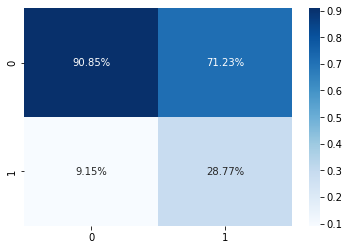

In [53]:
pl_dct = confusion_matrix(y_test,y_te_pred)
print(pd.DataFrame(pl_dct))
temp = pd.DataFrame(pl_dct)
sns.heatmap(temp/np.sum(temp), annot=True, fmt='.2%', cmap='Blues')

ROC/AUC

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
y_proba = dct.predict_proba(X_te_scaled)[:, 1]

In [56]:
fpr, tpr, treshold = roc_curve(y_test, y_proba)

In [57]:
roc_auc = metrics.auc(fpr, tpr)


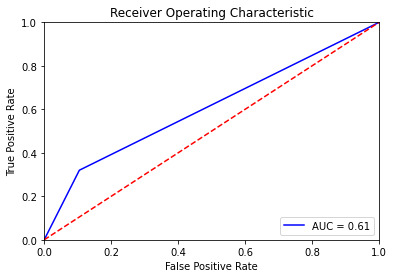

In [58]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All metrics are significantly worse with decision tree model.

#### Random Forest

In [59]:
rf = RandomForestClassifier().fit(X_tr_scaled, y_train)

In [60]:
y_tr_pred = rf.predict(X_tr_scaled)
y_te_pred = rf.predict(X_te_scaled)

In [61]:
y_tr_pred.mean()

0.11681991973962777

##### Make a pipeline with this model

In [62]:
y_te_pred.mean()

0.04143320554408729

In [63]:
pipe_rf = make_pipeline(scaler, rf)

##### Evaluating model using cross-validation

In [64]:
# perform StratifiedKFold as our target data is highly imbalanced and we want to replicate this during folding
k_fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)


In [65]:
cv_results = cross_validate(pipe_rf, X_train, y_train, cv=k_fold, scoring='accuracy')

In [66]:
print(pd.DataFrame(cv_results))

   fit_time  score_time  test_score
0  2.221906    0.129156    0.888626
1  2.338549    0.131157    0.891311
2  2.336185    0.134354    0.888924
3  2.442491    0.160910    0.892716
4  2.739652    0.152906    0.890030


In [67]:
cv_scores = cv_results['test_score']

In [68]:
np.mean(cv_scores), np.std(cv_scores)

(0.8903213797816765, 0.0015249633433662988)

In [69]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.89, 0.89])

In [70]:
print(classification_report(y_test, y_te_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.61      0.22      0.32      1587

    accuracy                           0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



       0    1
0  11759  218
1   1243  344


<AxesSubplot:>

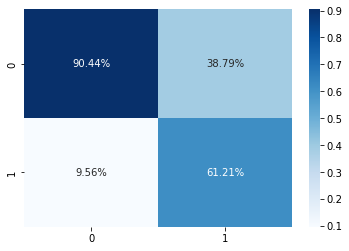

In [71]:
pl_rf = confusion_matrix(y_test,y_te_pred)
print(pd.DataFrame(pl_rf))
temp = pd.DataFrame(pl_rf)
sns.heatmap(temp/np.sum(temp), annot=True, fmt='.2%', cmap='Blues')

ROC/AUC

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

In [73]:
y_proba = rf.predict_proba(X_te_scaled)[:, 1]

In [74]:
fpr, tpr, treshold = roc_curve(y_test, y_proba)

In [75]:
roc_auc = metrics.auc(fpr, tpr)


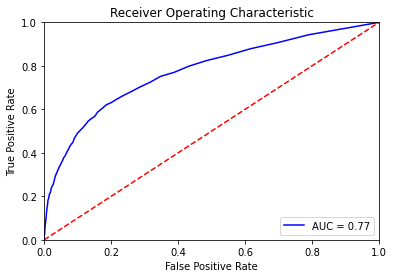

In [76]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest gave the best results so far.

### Hyperparameter search using GridSearchCV

#### Create RF pipe

In [77]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [78]:
# Create the grid search param
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__max_features':('auto', 'sqrt', 'log2')
}

RF_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [79]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(RF_pipe, param_grid = grid_params, cv = k_fold, verbose=0, n_jobs = -1)
# Fit the grid search model
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': ('auto',
                                                                  'sqrt',
                                                                  'log2'),
                         'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  3

In [80]:
rf_grid.best_params_


{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 297}

In [81]:
rf_best_cv_results = cross_validate(rf_grid.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.89004739, 0.89052133, 0.888766  , 0.89082003, 0.89271607])

In [82]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.8905741643633945, 0.0012804650002934555)

#### Feature Selection

30


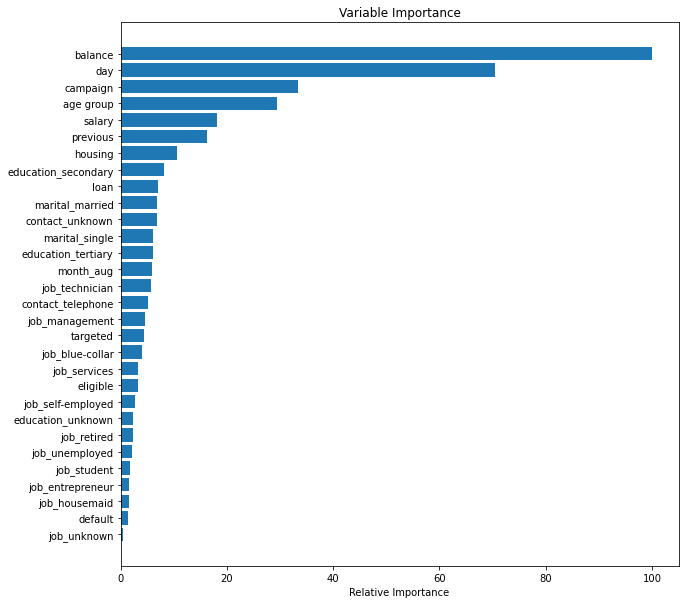

In [83]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Final Model Selection

In [84]:
best_model = rf_grid.best_estimator_

In [85]:
import pickle
Pkl_Filename = "Pickle_RF_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model, file)

In [86]:
df.to_csv(r'/Users/majapedigo/Desktop/Capstone-Project-I/pp_df.csv', index=False)
